# Анализ рынка заведений общественного питания Москвы

- Автор: Смирнов Александр Викторович
- Дата: 10.03.2025

### Цели и задачи проекта

<font color='#777778'>Основная цель проекта заключается в проведении комплексного анализа рынка заведений общественного питания Москвы для инвесторов из фонда Shut Up and Take My Money. Это поможет определить наиболее перспективную нишу и стратегию развития нового бизнеса, учитывая такие факторы, как конкуренция, расположение, целевая аудитория и потенциальная прибыль.



</font>

### Описание данных

<font color='#777778'>Файл `Датасет удален` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - `0` — заведение не является сетевым;
  - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `Датасет удален` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
  - «Средний счёт: 1000–1500 ₽»;
  - «Цена чашки капучино: 130–220 ₽»;
  - «Цена бокала пива: 400–600 ₽».
    и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
  - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>Основные шаги по выполнению аналитического проекта, связанного с исследованием данных о заведениях общественного питания в Москве. Он включает четыре основных этапа:

1. Загрузка и изучение данных: Описаны шаги по загрузке файлов с информацией о ресторанах и кафе, а также начальное ознакомление с этими данными. Важно проверить объем данных, их структуру, наличие пропусков и правильность типов данных.

2. Предобработка данных: Этапы подготовки данных перед анализом. Включают проверку типов данных, обработку пропущенных значений, удаление дубликатов и нормализацию текста для упрощения анализа. Также рекомендуется создать новый столбец is_24_7, который будет указывать, работают ли заведения круглосуточно.

3. Исследовательский анализ: Основная часть проекта, включающая исследование различных характеристик данных, таких как категории заведений, их географическое расположение, соотношение сетевых и несетевых ресторанов, количество посадочных мест, средний рейтинг и средний чек. Здесь активно используется визуализация данных для лучшего понимания результатов.

4. Итоговые выводы и рекомендации: После проведения всех анализов формулируются ключевые выводы и даются рекомендации для потенциальных заказчиков. Например, можно рекомендовать развивать бизнес в центральных районах города, ориентироваться на сетевые заведения и поддерживать высокие стандарты сервиса.</font>

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы.

In [1]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

import warnings
warnings.filterwarnings('ignore')

- Познакомьтесь с данными и изучите общую информацию о них.

In [3]:
df_rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
df_rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


<font color='#777778'>Датасет `Датасет удален` содержит 9 столбцов и 8406 строк, в которых содержится информация о заведениях общественного питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов уже приведены к одному виду, snake case.
- Данные содержат числовые и строковые значения, они хранятся в типах данных `float64(2)`, `int64(1)`, `object(6).
- Пропуски содержатся только в двух столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

</font>

In [5]:
df_rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
df_rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


<font color='#777778'>Датасет `Датасет удален` содержит 5 столбцов и 4058 строк, в которых содержится информация о среднем чеке в заведениях общественного питания. По аналогии с предыдущим датасетом можно отметить, что:

- Названия столбцов уже приведены к единому виду, snake case.
- Типы данных соответствуют содержимому.
- Пропусков на первый взгляд достаточно много, особенно в столбце `middle_coffee_cup`.
- Значения в столбцах соответствуют описанию.</font>

---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

<font color='#777778'>Первичное знакомство показывает, что данные `Датасет удален` хорошего качества — в них практически нет пропущенных значений, а сами данные соответствуют описанию и выглядят корректными. А вот про данные `Датасет удален`, нельзя сказать, что они хорошего качества, в них много пропусков. Столбец `price` представлен как категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее. `avg_bill`, хранит средний чек как диапазон стоимости в заказе.


Настало время следующего этапа — предобработки данных.</font>


### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [7]:
df = pd.merge(df_rest_info, df_rest_price, on= 'id', how= 'left')

df_old = df.copy()

In [8]:
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


<font color='#777778'>Данные соединены, и информация обо всех пользователях сохранилась.</font>


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

In [10]:
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

In [11]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

<font color='#777778'>На первый взгляд с типами данных все в порядке, если отталкиваться от их значений в столбцах. С названиями тоже все хорошо.</font>

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [12]:
for i in df.columns:
  print(f'Количество пропусков в столбце {i}: {df.shape[0] - df[i].count()}')

Количество пропусков в столбце id: 0
Количество пропусков в столбце name: 0
Количество пропусков в столбце category: 0
Количество пропусков в столбце address: 0
Количество пропусков в столбце district: 0
Количество пропусков в столбце hours: 536
Количество пропусков в столбце rating: 0
Количество пропусков в столбце chain: 0
Количество пропусков в столбце seats: 3611
Количество пропусков в столбце price: 5091
Количество пропусков в столбце avg_bill: 4590
Количество пропусков в столбце middle_avg_bill: 5257
Количество пропусков в столбце middle_coffee_cup: 7871


In [13]:
missing = (pd.DataFrame({'Количество пропусков': df_old.isnull().sum(), 'Доля пропусков': df_old.isnull().mean().round(4)}).style.background_gradient(cmap='coolwarm'))

missing

,Количество пропусков,Доля пропусков
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,536,0.063800
rating,0,0.000000
chain,0,0.000000
seats,3611,0.429600
price,5091,0.605600


<font color='#777778'>В датафрейме `df` обнаружено много пропусков в столбце:
- `seats` — это 43% данных, столбец содержит информацию о количестве мест в заведении. Пропуски могут быть обусловлены несколькими причинами:
  - Количество посадочных мест может меняться в зависимости от сезона, ремонта или других факторов, и данные могли устареть или просто отсутствует на этапе сбора данных.
  - В процессе обновления информации о заведениях могут пропускать этот параметр, особенно если он не считается приоритетным.

- `price` — это 60% данных, в столбце содержится информация о категории цен заведения (например, «средняя», «высокая»). Причины пропуска могут включать:
  - Информация о цене заведения может обновляться реже, чем другая информация, поскольку заведение не меняет свою категорию часто.
  - Заведение может предлагать блюда разного уровня стоимости, что затрудняет однозначную оценку его категории.

- `avg_bill` — это 55% данных, столбец хранит строку с указанием средней стоимости заказа. Причина пропуска может заключаться в следующем:
  - Средняя стоимость может отсутствовать, если заведение не предоставляет такую информацию.
  - Возможно, данные были неправильно обработаны, и средняя стоимость не была извлечена корректно.

- `middle_avg_bill` — это 63% данных, столбец содержит числовое значение средней стоимости заказа, рассчитанное на основе данных из столбца `avg_bill`. Пропуски могут возникать по следующим причинам:
  - Поскольку расчет производится на основе `avg_bill`, пустые значения в этом столбце приводят к пропускам в middle_avg_bill.
  - Отсутствие точного диапазона цен в avg_bill может препятствовать правильному вычислению медианного значения.

- `middle_coffee_cup` — это 94% данных, столбец содержит цену одной чашки капучино, рассчитываемую на основе данных из столбца `avg_bill`. Основная причина таких больших пропусков заключается в следующем:
  - Столбец заполняется только для записей, где указана цена капучино. Многие заведения могут не указывать эту конкретную информацию, что объясняет высокий процент пропусков.
  - Если в исходных данных отсутствуют конкретные сведения о цене капучино, то в результате будут пропуски.

 Количество пропусков достаточно большое, чтобы их просто удалить.</font>

- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [14]:
df.duplicated().sum()

0

<font color='#777778'>В датафреймах нет полных дубликатов строк. Проверим неявные дубликаты — значения по `id` клиентов должны быть уникальными, то есть каждая строка в данных — уникальный клиент: </font>

In [15]:
df['name'] = df['name'].str.lower()

In [16]:
df.duplicated(subset= 'id').sum()

0

In [17]:
print(f"Найдено: {df.duplicated(subset= ['name', 'address']).sum()} дубликата")

df = df.drop_duplicates(subset= ['name', 'address'])

print(f"Найдено: {df.duplicated(subset= ['name', 'address']).sum()} дубликатов, после удаления")


Найдено: 3 дубликата
Найдено: 0 дубликатов, после удаления


In [18]:
df['price'].unique()

array([nan, 'выше среднего', 'средние', 'высокие', 'низкие'], dtype=object)

<font color='#777778'>Тут тоже всё хорошо — каждая строка соответствует уникальному клиенту. </font>

- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [19]:
df['is_24_7'] = (df['hours'].str.contains('ежедневно') & df['hours'].str.contains('круглосуточно'))

df['is_24_7'].value_counts()

False    7673
True      730
Name: is_24_7, dtype: int64

In [20]:
df_test = df[['avg_bill', 'middle_avg_bill']]

df_test['avg_bool'] = df['avg_bill'].str.contains('Средний счёт')

df_test[df_test['avg_bool'] == True].isna().sum()

avg_bill           0
middle_avg_bill    0
avg_bool           0
dtype: int64

<font color='#777778'>Решил проверить, заполнение столбца по условию из задания, все верно. `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»</font>

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

<font color='#777778'>
После анализа данных было выявлено значительное количество пропусков в нескольких столбцах и сделал промежуточные выводы.

Пропущенные данные:
- `seats`: 43% данных пропущено. Это может быть связано с изменениями количества посадочных мест или отсутствием актуальных данных на момент сбора.
- `price`: 60% данных пропущено. Категория цен заведений может обновляться редко или не предоставляться в явной форме.
- `avg_bill`: 55% данных пропущено. Средняя стоимость заказа может отсутствовать, если заведение не предоставляет такие данные.
- `middle_avg_bill`: 63% данных пропущено. Эти пропуски зависят от наличия данных в столбце `avg_bill`.
- `middle_coffee_cup`: 94% данных пропущено. Высокая доля пропусков обусловлена отсутствием конкретных сведений о цене капучино.

Дубликаты:
- Датафрейм не содержит полных дубликатов строк.
- Уникальность идентификаторов клиентов (id) проверена и подтвердилась, что каждая строка представляет собой  уникальные записи.

Заполнение столбцов:
- Проведена проверка заполнения столбца `middle_avg_bill` по условию задания, результаты соответствуют ожиданиям.  Этот столбец содержит числовые оценки среднего чека, указанные только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт».

Учитывая высокую долю пропусков, удаление данных может существенно повлиять на объем выборки.
</font>

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

In [21]:
df['category'].value_counts()

кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

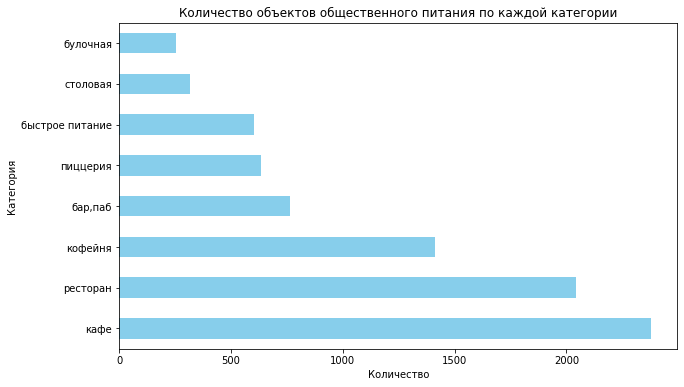

In [22]:
df['category'].value_counts().plot(kind= 'barh',
                                   title= 'Количество объектов общественного питания по каждой категории',
                                   ylabel= 'Категория',
                                   color= 'skyblue',
                                   figsize= (10, 6))
plt.xlabel('Количество')
plt.show()

<font color='#777778'>Выводы:
- Рестораны, кофейни и кафе занимают лидирующие позиции, составляя основу рынка общественного питания.
- Бары и пиццерии также востребованы, но их доля меньше.
- Заведения типа столовых, фаст-фуда и булочных встречаются значительно реже, что отражает меньшую популярность этих форматов.</font>

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

In [23]:
df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

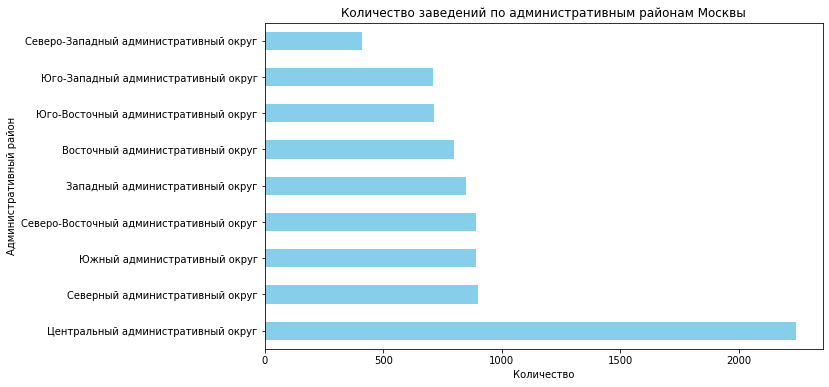

In [24]:
df['district'].value_counts().plot(kind= 'barh',
                                   title= 'Количество заведений по административным районам Москвы',
                                   ylabel= 'Административный район',
                                   color= 'skyblue',
                                   figsize= (10, 6))
plt.xlabel('Количество')
plt.show()

<font color='#777778'>Выводы:
- Центральный административный округ имеет наибольшее количество заведений, что связано с его ролью делового и культурного центра города.
- Северные, Южный и Северо-Восточный округа также демонстрируют значительное количество заведений, что может быть обусловлено плотностью населения и развитой инфраструктурой.
- Западный, Восточный, Юго-Западный и Юго-Восточный округа имеют еще более меньшее количество.
- Северо-Западный округ имеет наименьшее количество заведений, что может быть связано с менее развитой инфраструктурой.
</font>

In [25]:
df_central = df[df['district'] == 'Центральный административный округ']

df_central['category'].value_counts()

ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64

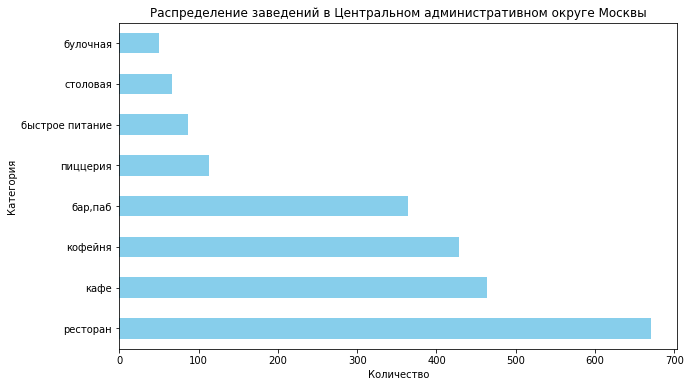

In [26]:
df_central['category'].value_counts().plot(kind= 'barh',
                                   title= 'Распределение заведений в Центральном административном округе Москвы',
                                   ylabel= 'Категория',
                                   color= 'skyblue',
                                   figsize= (10, 6))
plt.xlabel('Количество')
plt.show()

<font color='#777778'>Выводы:
- Рестораны, бары/пабы и кофейни занимают лидирующие позиции по количеству заведений.
- Кафе и пиццерии также достаточно распространены, что подтверждает интерес потребителей к легкому питанию и итальянской кухне.
- Заведения быстрого питания, столовые и булочные занимают меньшую долю рынка, что может отражать их более специализированный характер и ограниченный круг клиентов.</font>

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

In [27]:
df['chain_str'] = df['chain'].replace({0: 'несетевое', 1: 'сетевое'})

df['chain_str'].value_counts()

несетевое    5200
сетевое      3203
Name: chain_str, dtype: int64

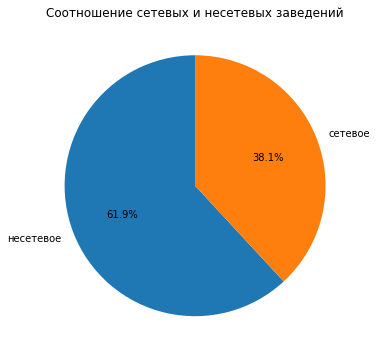

In [28]:
values = df['chain_str'].value_counts()
labels = values.index

plt.figure(figsize=(10, 6)) 

plt.pie(values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90)      

plt.title('Соотношение сетевых и несетевых заведений')

plt.show()

<font color='#777778'>Вывод:
Несетевые заведения преобладают над сетевыми, имея значительное преимущество по численности. Несетевых магазинов насчитывается 5200, тогда как сетевых — 3203.
</font>

In [29]:
df_chain = df[df['chain_str'] == 'сетевое']

In [30]:
df_chain_share = (df_chain.groupby('category')['chain_str'].count() / df.groupby('category')['chain_str'].count()).round(2).reset_index().sort_values(by= 'chain_str', ascending= False)

df_chain_share

,category,chain_str
1,булочная,0.61
5,пиццерия,0.52
4,кофейня,0.51
2,быстрое питание,0.38
6,ресторан,0.36
3,кафе,0.33
7,столовая,0.28
0,"бар,паб",0.22


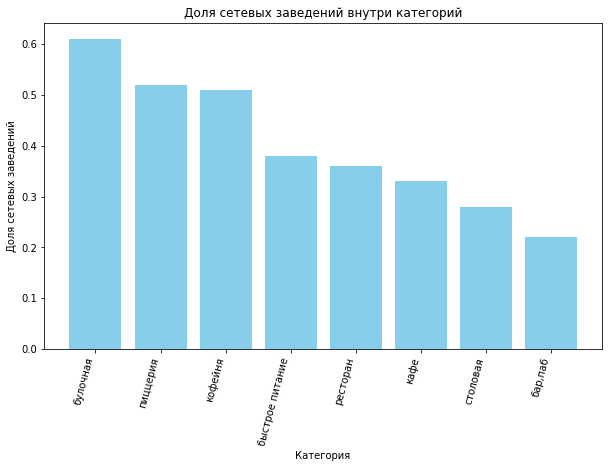

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_chain_share['category'], df_chain_share['chain_str'], color= 'skyblue')

ax.set_xticklabels(df_chain_share['category'], rotation=75, ha='right', va='top')
ax.set_xlabel('Категория')
ax.set_ylabel('Доля сетевых заведений')

ax.set_title('Доля сетевых заведений внутри категорий')

plt.show()

<font color='#777778'>Вывод:
- В большинстве категорий количество несетевых заведений превышает сетевые. 
- Однако есть категории, где сетевые заведения либо доминируют, либо близки по количеству к несетевым.
</font>

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [32]:
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

<font color='#777778'>Для начала, посмотрим на значения, которые мы имеем:
- Среднее значение (mean) = 109.42
- Стандартное отклонение (std) = 114.7
- Максимальное значение (max) = 1288

Максимальное значение в данных — 1288. Это значение значительно превышает верхнюю границу в 95 и 99 процентиля, что указывает на наличие выброса.

</font>

In [33]:
outliers = df['seats'].quantile(0.95)

# Отбираем данные, оставляя значения меньше найденного порога выбросов
new_df = df.loc[df['seats'] < outliers]

new_df['seats'].describe()

count    4550.000000
mean       88.127692
std        70.859617
min         0.000000
25%        40.000000
50%        70.000000
75%       120.000000
max       306.000000
Name: seats, dtype: float64

<font color='#777778'>Отбираем данные, оставляя значения меньше найденного порога выбросов:
- Среднее значение (mean) = 90.61
- Стандартное отклонение (std) = 70.37
- Максимальное значение (max) = 310

Поскольку минимальное значение равно 0, оно находится внутри допустимого диапазона, так как отрицательные значения в данном контексте недопустимы. Однако максимальное значение (310), следовательно, выбросов среди данных нет.

</front>

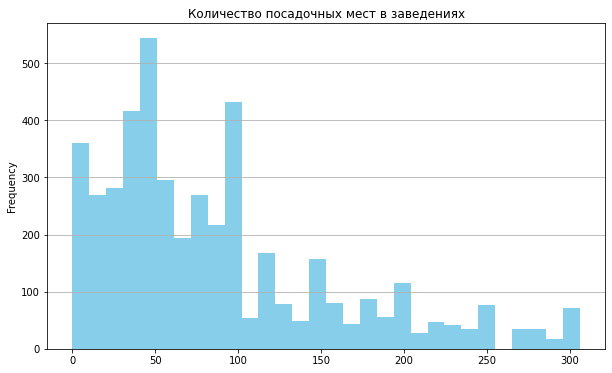

In [34]:
new_df['seats'].plot(kind= 'hist',
                 bins= 30,
                 title= 'Количество посадочных мест в заведениях',
                 color= 'skyblue',
                 figsize= (10, 6))

plt.grid(axis= 'y')
plt.show()

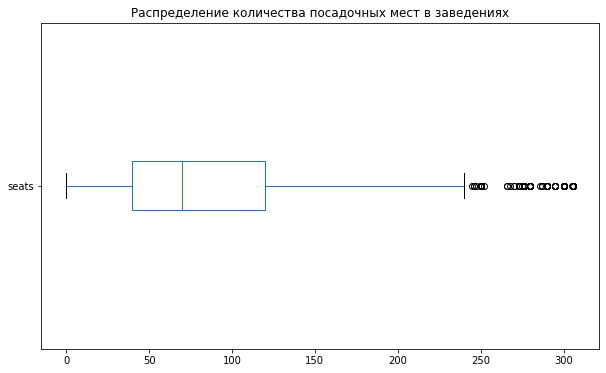

In [35]:
new_df['seats'].plot(kind= 'box',
                 vert= False,
                 title= 'Распределение количества посадочных мест в заведениях',
                 figsize= (10, 6))

plt.show()

Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест

In [36]:
cat_se = new_df.groupby('category', as_index= False)['seats'].median().sort_values(by= 'seats', ascending= False)

cat_se

,category,seats
0,"бар,паб",80.0
6,ресторан,80.0
7,столовая,72.0
4,кофейня,70.0
2,быстрое питание,60.0
3,кафе,55.5
5,пиццерия,50.0
1,булочная,48.5


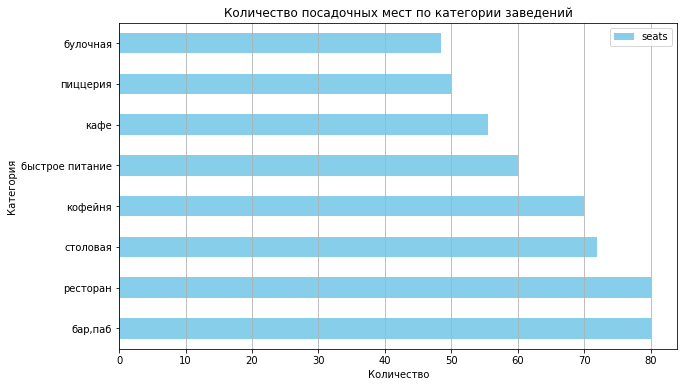

In [37]:
cat_se.plot(kind= 'barh',
            x= 'category',
            title= 'Количество посадочных мест по категории заведений',
            xlabel= 'Категория',
            color= 'skyblue',
            figsize= (10, 6))

plt.xlabel('Количество')
plt.grid(axis= 'x')
plt.show()

<font color='#777778'>Вывод:<br>
Если убрать аномальные значения и выбросы.
- Максимальное количество мест — в категории "ресторан" (80 места).
- Минимальное количество мест — в категории "булочная" (48 мест).

В заведениях типа "бар, паб" и "быстрое питание" количество мест примерно одинаковое (около 80), что делает эти заведения одними из самых вместительных после ресторанов.

Заведения вроде "булочной", "кофейни" и "столовой" имеют схожее среднее количество мест (около 48-55).
</font>

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [38]:
df_rating = df.groupby('category', as_index= False)['rating'].mean().round(2).sort_values(by= 'rating', ascending= False)

df_rating

,category,rating
0,"бар,паб",4.39
5,пиццерия,4.30
6,ресторан,4.29
4,кофейня,4.28
1,булочная,4.27
7,столовая,4.21
3,кафе,4.12
2,быстрое питание,4.05


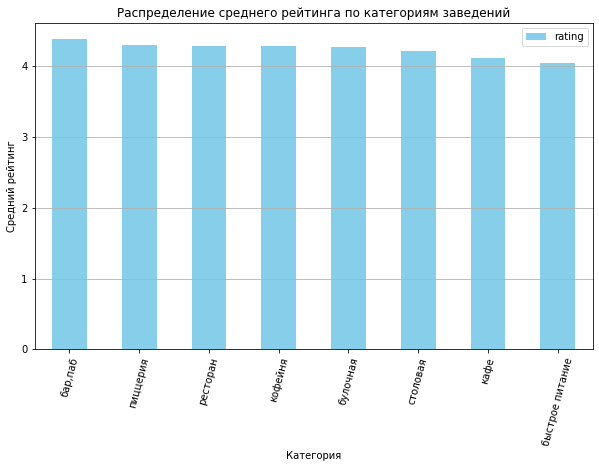

In [39]:
df_rating.plot(kind= 'bar',
              title= 'Распределение среднего рейтинга по категориям заведений',
              ylabel= 'Средний рейтинг',
              xlabel= 'Категория',
              color= 'skyblue',
              rot= 75,
              figsize= (10, 6),
              x= 'category')

plt.grid(axis= 'y')
plt.show()

<font color='#777778'>Вывод:<br>
Усреднённые рейтинги для разных типов заведений варьируются незначительно. Разница между максимальным рейтингом (ресторан — 4.37) и минимальным (булочная — 4.17) составляет всего 0.20 балла. 
</font>

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [40]:
# Вычисляем корреляционную матрицу с использованием phi_k
corr_matrix = df[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7', 'rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


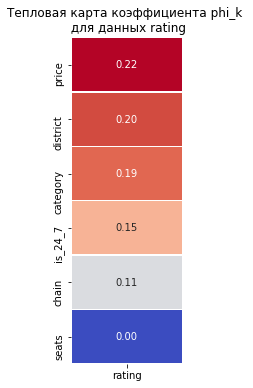

In [41]:
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')

# Выводим график
plt.show()

<font color='#777778'>Вывод:
- Цена» (коэффициент корреляции равен 0.220295) -  наиболее сильная корреляция.
- Категория (коэффициент корреляции 0.208056) — также показывает заметную корреляцию с рейтингом.
- Район (коэффициент корреляции 0.185866) — корреляция чуть меньше, но тоже существенна. 
- Сеть (коэффициент корреляции 0.151431),
- Работа круглосуточно (коэффициент корреляции 0.124523),
- Количество мест (коэффициент корреляции 0.000000) — судя по всему, практически не коррелируют с рейтингом.

Самые сильные корреляции с рейтингом заведения наблюдаются с переменными «цена» и «категория». Эти факторы оказывают наибольшее влияние на формирование рейтинга заведения.
</font>

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [43]:
df.groupby(['name', 'category'], 
           as_index= False).agg({'id': 'count', 
                                 'rating': 'mean'},).sort_values(by= 'id', 
                                                                 ascending= False).head(15).round(2)


,name,category,id,rating
3038,кафе,кафе,159,3.85
5869,шоколадница,кофейня,119,4.18
2713,домино'с пицца,пиццерия,77,4.17
2678,додо пицца,пиццерия,74,4.29
1202,one price coffee,кофейня,72,4.07
5945,яндекс лавка,ресторан,69,3.87
427,cofix,кофейня,65,4.08
1343,prime,ресторан,49,4.11
3415,кофепорт,кофейня,42,4.15
3479,кулинарная лавка братьев караваевых,кафе,39,4.39


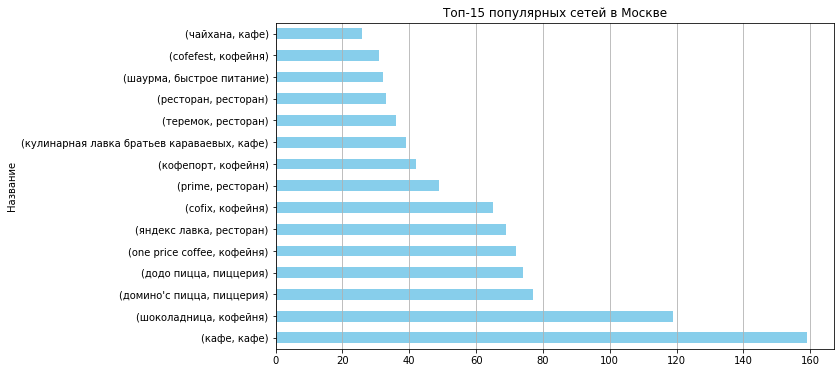

In [44]:
df.groupby(['name', 'category'])['id'].count().sort_values(ascending= False).head(15).plot(kind= 'barh',
                                                               title= 'Топ-15 популярных сетей в Москве',
                                                               xlabel= 'Название',
                                                               figsize= (10, 6),
                                                               color= 'skyblue')
plt.grid(axis= 'x')
plt.show()

In [45]:
name_cat_rating = df.groupby(['name', 'category'], 
           as_index= False).agg({'id': 'count', 
                                 'rating': 'mean'},).sort_values(by= 'id', 
                                                                 ascending= False).head(15).round(2)

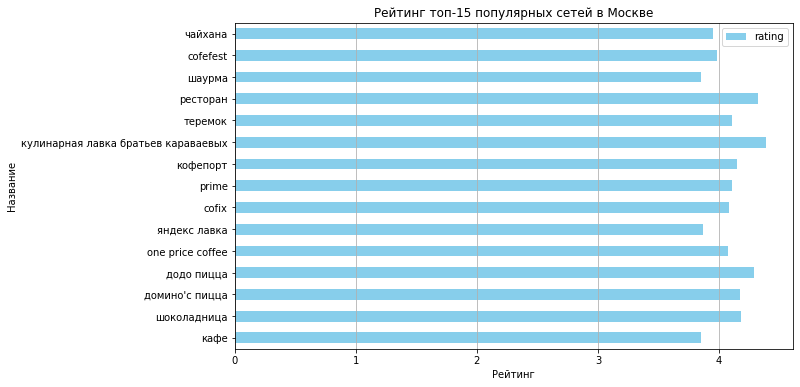

In [46]:
name_cat_rating.plot(kind= 'barh',
                    y= 'rating',
                    x= 'name',
                    title= 'Рейтинг топ-15 популярных сетей в Москве',
                    figsize= (10, 6),
                    color= 'skyblue')

plt.ylabel('Название')
plt.xlabel('Рейтинг')
plt.grid(axis= 'x')
plt.show()

<font color='#777778'>Вывод:<br>
Наиболее распространенными являются кофейни и пиццерии, такие как "Шоколадница", "Додо Пицца" и "Домино'с Пицца". Рестораны также занимают значительную долю рынка, особенно такие сети, как "Теремок" и "Тануки". Бар/пабы представлены в меньшей степени, но также имеют свою аудиторию.
</font>

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


In [47]:
df_dist = df.groupby('district', 
                     as_index= False)['middle_avg_bill'].mean().round(2).sort_values(by= 'middle_avg_bill',
                                                                                     ascending= False)

df_dist

,district,middle_avg_bill
5,Центральный административный округ,1191.06
1,Западный административный округ,1053.23
2,Северный административный округ,927.96
8,Южный административный округ,834.40
4,Северо-Западный административный округ,822.22
0,Восточный административный округ,820.63
7,Юго-Западный административный округ,792.56
3,Северо-Восточный административный округ,716.61
6,Юго-Восточный административный округ,654.10


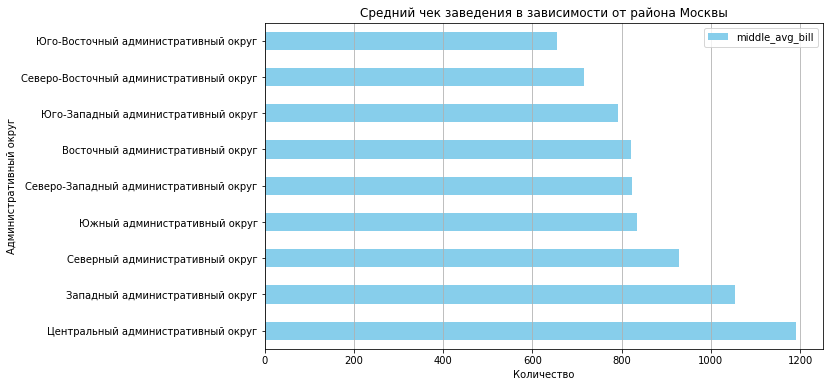

In [48]:
df_dist.plot(kind= 'barh',
            title= 'Средний чек заведения в зависимости от района Москвы',
            figsize= (10, 6),
            color= 'skyblue',
            x= 'district')

plt.ylabel('Административный округ')
plt.xlabel('Количество')
plt.grid(axis= 'x')
plt.show()

<font color='#777778'>Вывод:<br>
Цены в Центральном административном округе (ЦАО) значительно выше, чем в остальных административных округах Москвы. ЦАО имеет цену 1191.06, что заметно больше всех остальных округов. 

- ЦАО vs Юго-Восточный АО — разница составляет около 537 единиц (1191.06 - 654.10). Это самое большое падение цен среди представленных округов.
- ЦАО vs Западный АО — цена в ЦАО почти на 138 единиц выше, чем в ЗАО (1191.06 - 1053.23).
</font>

In [49]:
df_middle_avg_bill = df.groupby('district', 
                                as_index= False)['middle_avg_bill'].agg(['mean', 
                                                                         'median']).round(2).sort_values(by= 'mean', ascending= False)

df_middle_avg_bill.sort_values(by= 'mean', ascending= False)

,mean,median
district,,
Центральный административный округ,1191.06,1000.0
Западный административный округ,1053.23,1000.0
Северный административный округ,927.96,650.0
Южный административный округ,834.40,500.0
Северо-Западный административный округ,822.22,700.0
Восточный административный округ,820.63,575.0
Юго-Западный административный округ,792.56,600.0
Северо-Восточный административный округ,716.61,500.0
Юго-Восточный административный округ,654.10,450.0


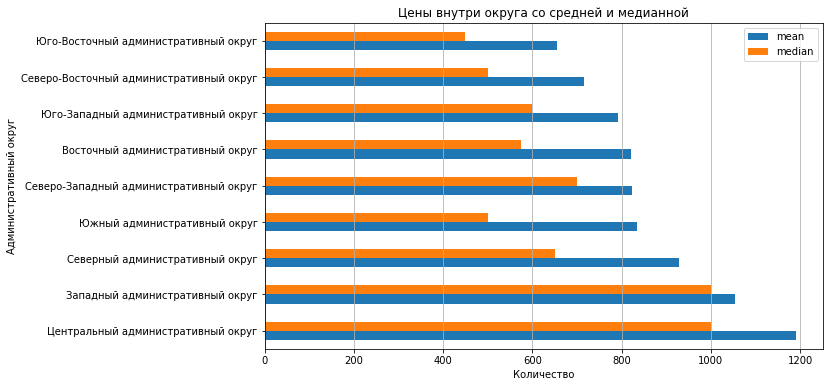

In [50]:
df_middle_avg_bill.plot(kind= 'barh',
                        figsize= (10, 6),
                        title= 'Цены внутри округа со средней и медианной')

plt.ylabel('Административный округ')
plt.xlabel('Количество')
plt.grid(axis= 'x')
plt.show()

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

<font color='#777778'> 
Полученные данные позволяют сделать несколько важных выводов о состоянии рынка общественного питания:

1. Популярность основных форматов
  - Рестораны, кофейни и кафе являются самыми многочисленными типами заведений. Это отражает широкий спрос на различные варианты досуга и перекуса.
  - Специализированные заведения, такие как бары/пабы и пиццерии, также пользуются спросом, хотя их число меньше.
  - Менее популярные форматы, такие как столовые и заведения быстрого питания, присутствуют, но их доля значительно ниже.
2. Преобладание несетевых заведений
  - Несетевые заведения заметно превосходят сетевые по числу представленных точек. Это говорит о высокой конкуренции и разнообразии предложений на рынке.
  - Тем не менее, сетевые заведения играют важную роль, особенно в сегменте пиццерий, где они доминируют благодаря таким известным брендам, как "Додо Пицца" и "Домино'с Пицца".
3. Уровень удовлетворённости клиентов
  - Средний рейтинг заведений практически одинаков для всех категорий, разница составляет лишь 0.20 баллов. Это значит, что клиенты одинаково довольны услугами независимо от формата заведения.
  - Небольшие отличия в рейтинге связаны скорее с субъективностью оценок, чем с существенными различиями в качестве обслуживания.
4. Количество посадочных мест
  - Рестораны лидируют по среднему количеству мест, предлагая наибольшую вместимость.
  - Заведения типа баров и быстрого питания также предлагают достаточно пространства для посетителей, что важно для их формата.
  - Кафе, кофейни и булочные имеют меньшее количество мест, что соответствует их концепции уютных и компактных пространств.
  
5. Географическая зависимость цен:
  - Стоимость услуг снижается по мере удаления от центра города.
  - Сильные корреляции с рейтингом заведения наблюдаются с факторами цены и категории. Таким образом, цена является одним из ключевых факторов, влияющих на восприятие заведения клиентами.

Основные выводы:
- Потребители стремятся к разнообразию, выбирая между ресторанами, кофейнями, кафе и специализированными заведениями.
- Несмотря на преобладание последних, сетевые заведения остаются значимыми игроками, особенно в сегментах пиццерий и ресторанов.
- Клиенты оценивают разные типы заведений почти одинаково, что говорит о высоком общем уровне сервиса.
- Чем дальше заведение расположено от центра, тем ниже его средняя цена, что создает возможность для более демократичных вариантов питания.
</font>

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

<font color='#777778'> 
1. Общий обзор проделанной работы:
Проведен детальный анализ двух наборов данных: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`. Данные были исследованы на предмет качества, наличие пропусков, дубликатов, распределения категорий заведений и особенностей заполнения отдельных столбцов. Особое внимание уделялось пропускам в значениях, поскольку это могло оказать существенное влияние на интерпретацию результатов.

Основные моменты анализа включают:

- Высокое количество пропусков в некоторых столбцах (`seats`, `price`, `avg_bill`, `middle_avg_bill`), что требует аккуратного подхода к обработке данных.
- Отсутствие полных дубликатов строк и уникальных идентификаторов, подтверждающих корректность записей.
- Проверка соответствия значений в столбце `middle_avg_bill` заданному условию показала соответствие ожиданий.

Также была проведена оценка популярности различных типов заведений, что позволило выявить наиболее распространенные категории, такие как `рестораны`, `кофейни` и `кафе`, а также зависимость средней стоимости услуги от удалённости от центра города.

2. Ответы на исследовательские вопросы, или главные выводы:
- Набор данных `Датасет удален` обладает высоким качеством, однако `Датасет удален` имеет значительные пропуски, особенно в столбцах `seats (43%)`, `price (60%)` и `middle_coffee_cup (94%)`. Это снижает точность анализа и требует осторожного подхода при интерпретации результатов.
- Рестораны, кофейни и кафе составляют основную массу представленных заведений, демонстрируя высокий спрос на различные типы общественного питания. Заведения быстрого питания и пиццерии также пользуются спросом, хотя их доли меньше.
- Средний рейтинг различных типов заведений варьируется незначительно, разница между максимальным и минимальным значением составляет всего 0.2 балла. Это указывает на общий высокий уровень удовлетворенности клиентов независимо от типа заведения.
- Сильные корреляции с рейтингом заведения наблюдаются с переменными `«цена»` и `«категория»`, что подчеркивает важность этих факторов в формировании общего впечатления клиента.
- Стоимость снижается с увеличением расстояния от центрального административного округа (ЦАО) до периферийных районов Москвы.

3. Рекомендации на основе анализа данных:
Обработка пропусков:
- Для столбцов с большим количеством пропусков рекомендуется использовать методы заполнения (например, медианное значение или интерполяция) либо исключение данных, чтобы избежать искажений в анализе.
- Важно учесть контекст каждого пропуска и принять решение о методике обработки индивидуально для каждой колонки.

Улучшение данных:
- Рекомендуется собирать дополнительные данные для заполнения пропусков, особенно для критически важных столбцов, таких как `seats`, `price` и `middle_coffee_cup`.
- Регулярно обновлять данные, чтобы поддерживать актуальность информации и минимизировать риск появления новых пропусков.

Маркетинговая стратегия:
- Учитывая сильную корреляцию между ценой и категорией заведения с рейтингом, стоит уделять особое внимание ценовой политике и позиционированию заведения на рынке.
- Продвигать сеть ресторанов и кофеен, учитывая их популярность среди потребителей, а также развивать предложения для специфичных ниш (например, пиццерии и булочные).

Анализ влияния местоположения:
- Рассмотреть возможность открытия новых точек в районах с низкой конкуренцией, где затраты на аренду помещений могут быть ниже, а потенциальная аудитория достаточно велика.
- Учитывать локальные предпочтения жителей разных округов при разработке маркетинговых стратегий.

Мониторинг удовлетворенности клиентов:
-Постоянный сбор отзывов и рейтингов позволит оперативно реагировать на изменения в предпочтениях клиентов и улучшать качество предоставляемых услуг.

Этот анализ позволяет заказчику получить полное представление о состоянии данных и потенциальных направлениях развития бизнеса в сфере общественного питания.
</font> 